In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
file = "./Data/coffee_sales.csv"
sales_df = pd.read_csv(file)

In [4]:
sales_df.head()

,Area Code,Cogs,DifferenceBetweenActualandTargetProfit,Date,Inventory Margin,Margin,Market_size,Market,Marketing,Product_line,...,Profit,Sales,State,State_abbr,Target_cogs,Target_margin,Target_profit,Target_sales,Total_expenses,Type
0,303,51,-35,10/1/2012,503,71,Major Market,Central,46,Leaves,...,-5,122,Colorado,CO,30,60,30,90,76,Decaf
1,970,52,-24,10/1/2012,405,71,Major Market,Central,17,Leaves,...,26,123,Colorado,CO,30,60,50,90,45,Decaf
2,409,43,-22,10/2/2012,419,64,Major Market,South,13,Leaves,...,28,107,Texas,TX,30,60,50,90,36,Decaf
3,850,38,-15,10/3/2012,871,56,Major Market,East,10,Leaves,...,35,94,Florida,FL,40,60,50,100,21,Regular
4,562,72,6,10/4/2012,650,110,Major Market,West,23,Leaves,...,56,182,California,CA,20,60,50,80,54,Regular


In [5]:
#calculating the total sales for each area code
area_performance = sales_df.groupby('Area Code')[['Sales']].sum()
area_performance.head()

,Sales
Area Code,
203,2834
206,2971
209,1777
210,425
212,881


In [6]:
#calculating the total sales for each state

state_performance = sales_df.groupby('State')[['Sales']].sum()
state_performance.head()

,Sales
State,
California,23032
Colorado,12112
Connecticut,6670
Florida,8825
Illinois,16812


In [7]:
#calculating the total sales for each state

state_performance = sales_df.groupby('State_abbr')[['Sales']].sum()
state_performance.head()

,Sales
State_abbr,
CA,23032
CO,12112
CT,6670
FL,8825
IA,13359


In [8]:
#calculating state performance broken down by product type
northeast = ['NY', 'CT', 'NH', 'MA']
product_location_performance = sales_df.groupby(['State_abbr', 'Product_type'])[['Sales']].sum().reset_index()
NE_product_sales = product_location_performance[product_location_performance['State_abbr'].isin(northeast)]
NE_product_sales.dtypes

State_abbr      object
Product_type    object
Sales            int64
dtype: object

In [9]:
mellow_palette = ['#003f5c', '#7a5195', '#ef5675', '#ffa600']
#['#8B4513', '#D2B48C', '#6B5C4D', '#00704A']

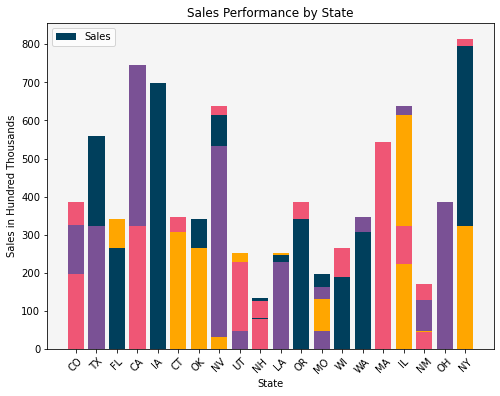

In [10]:
# Create a bar chart for performance by area
plt.figure(figsize=(8, 6))
plt.bar(sales_df['State_abbr'], sales_df['Sales'], color=mellow_palette, label='Sales')
plt.xlabel('State')
plt.gca().set_facecolor('#F5F5F5')
plt.xticks(rotation=45)
plt.ylabel('Sales in Hundred Thousands')
plt.title('Sales Performance by State')
plt.legend()
plt.show()

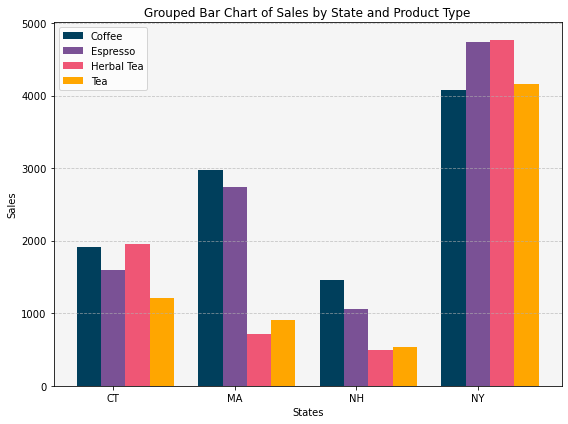

In [11]:
pivot_df = NE_product_sales.pivot(index='State_abbr', columns='Product_type', values='Sales')
product_types = pivot_df.columns
fig, ax = plt.subplots(figsize=(8, 6))

# Define the width of each bar and the positions
bar_width = 0.2
x = range(len(pivot_df))

for i, product_type in enumerate(product_types):
    ax.bar(
        [pos + i * bar_width for pos in x],
        pivot_df[product_type],
        bar_width,
        label=product_type,
        color=mellow_palette[i]
    )

# Customize the chart
ax.set_xlabel('States')
ax.set_ylabel('Sales')
ax.set_title('Grouped Bar Chart of Sales by State and Product Type')
ax.set_xticks([pos + bar_width for pos in x])
ax.set_xticklabels(pivot_df.index)
ax.legend()

# Show the chart
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.gca().set_facecolor('#F5F5F5')
plt.tight_layout()
plt.show()

#usable, need new color scheme but focusing Viz on NE region

In [20]:
# Convert 'Date' column to datetime format
sales_df['Date'] = pd.to_datetime(sales_df['Date'])
sales_df = sales_df[sales_df['State_abbr'].isin(northeast)]
sales_df

,Area Code,Cogs,DifferenceBetweenActualandTargetProfit,Date,Inventory Margin,Margin,Market_size,Market,Marketing,Product_line,...,Sales,State,State_abbr,Target_cogs,Target_margin,Target_profit,Target_sales,Total_expenses,Type,Quarter
6,860,47,-29,2012-10-06,375,64,Small Market,East,15,Beans,...,111,Connecticut,CT,30,60,50,90,43,Decaf,2012Q4
10,603,49,-27,2012-10-10,310,71,Small Market,East,15,Beans,...,120,New Hampshire,NH,30,60,60,90,38,Regular,2012Q4
11,603,45,-26,2012-10-11,447,69,Small Market,East,14,Beans,...,114,New Hampshire,NH,30,60,50,90,45,Regular,2012Q4
12,603,45,-37,2012-10-12,320,64,Small Market,East,41,Beans,...,109,New Hampshire,NH,30,60,30,90,71,Regular,2012Q4
20,860,40,-14,2012-10-20,881,59,Small Market,East,11,Leaves,...,99,Connecticut,CT,40,60,50,100,23,Regular,2012Q4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
719,518,250,143,2014-09-19,723,407,Major Market,East,70,Beans,...,700,New York,NY,240,400,320,640,95,Regular,2014Q3
720,631,294,249,2014-09-20,1727,453,Major Market,East,111,Leaves,...,796,New York,NY,220,320,210,540,144,Decaf,2014Q3
721,716,241,-130,2014-09-21,5121,-93,Major Market,East,74,Leaves,...,158,New York,NY,180,-80,-150,100,96,Decaf,2014Q3
722,718,86,42,2014-09-22,1003,124,Major Market,East,24,Leaves,...,224,New York,NY,90,120,90,210,35,Regular,2014Q3


In [21]:
# Group data by quarter and calculate total sales for each quarter
sales_df['Quarter'] = sales_df['Date'].dt.to_period('Q')
quarterly_sales = sales_df.groupby('Quarter')['Sales'].sum().reset_index()
quarterly_sales['Quarter'] = quarterly_sales['Quarter'].dt.strftime('Q%q %Y')

print(quarterly_sales)

   Quarter  Sales
0  Q4 2012   2182
1  Q1 2013   2028
2  Q2 2013   1371
3  Q3 2013   1419
4  Q4 2013   2365
5  Q1 2014   1047
6  Q2 2014   2344
7  Q3 2014  22527


c:\Users\peten\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [26]:
#checking the DF datatypes
quarterly_sales.dtypes

Quarter    object
Sales       int64
dtype: object

In [27]:
#updating 'quarter' column datatypes to string so it can be used with plt
sales_df['Quarter'] = sales_df['Quarter'].astype(str)
quarterly_sales['Quarter'] = quarterly_sales['Quarter'].astype(str)


c:\Users\peten\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


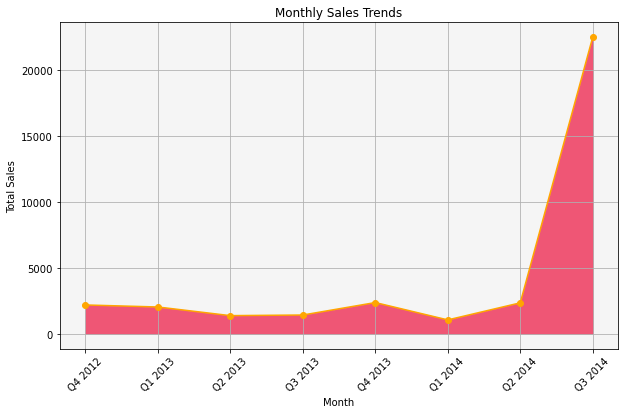

In [38]:
# Create a line chart to visualize sales trends
plt.figure(figsize=(10, 6))
plt.plot(quarterly_sales['Quarter'], quarterly_sales['Sales'], marker='o', color=mellow_palette[3])
plt.title('Monthly Sales Trends')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.fill_between(quarterly_sales['Quarter'], quarterly_sales['Sales'], color=mellow_palette[2])
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.gca().set_facecolor('#F5F5F5')
plt.grid(True)
plt.show()

#usable. any improvments other than colors?

In [65]:
category_sales = sales_df.groupby('Product_type')['Sales'].sum()
category_sales.head()

Product_type
Coffee        52373
Espresso      56013
Herbal Tea    51685
Tea           42824
Name: Sales, dtype: int64

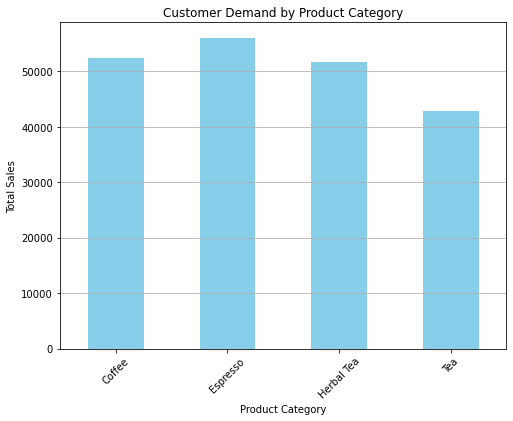

In [66]:
plt.figure(figsize=(8, 6))
category_sales.plot(kind='bar', color='skyblue')
plt.title('Customer Demand by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y')
plt.show()

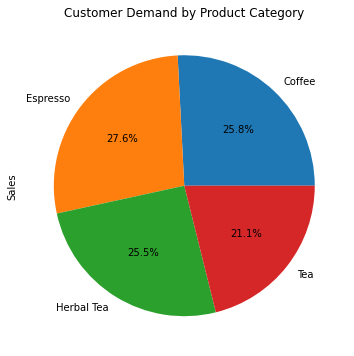

In [85]:
plt.figure(figsize=(8, 6))
category_sales.plot(kind='pie', autopct='%1.1f%%')
plt.title('Customer Demand by Product Category')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [67]:
sales_df.head()

,Area Code,Cogs,DifferenceBetweenActualandTargetProfit,Date,Inventory Margin,Margin,Market_size,Market,Marketing,Product_line,...,Sales,State,State_abbr,Target_cogs,Target_margin,Target_profit,Target_sales,Total_expenses,Type,Quarter
0,303,51,-35,2012-10-01,503,71,Major Market,Central,46,Leaves,...,122,Colorado,CO,30,60,30,90,76,Decaf,2012Q4
1,970,52,-24,2012-10-01,405,71,Major Market,Central,17,Leaves,...,123,Colorado,CO,30,60,50,90,45,Decaf,2012Q4
2,409,43,-22,2012-10-02,419,64,Major Market,South,13,Leaves,...,107,Texas,TX,30,60,50,90,36,Decaf,2012Q4
3,850,38,-15,2012-10-03,871,56,Major Market,East,10,Leaves,...,94,Florida,FL,40,60,50,100,21,Regular,2012Q4
4,562,72,6,2012-10-04,650,110,Major Market,West,23,Leaves,...,182,California,CA,20,60,50,80,54,Regular,2012Q4


In [74]:
tea = ['Tea', 'Herbal Tea']
tea_df = sales_df[sales_df["Product_type"].isin(tea)]
tea_df = tea_df.groupby('Quarter')['Sales'].sum().reset_index()
tea_df.head()

,Quarter,Sales
0,2012Q4,6210
1,2013Q1,7212
2,2013Q2,6032
3,2013Q3,5394
4,2013Q4,4509


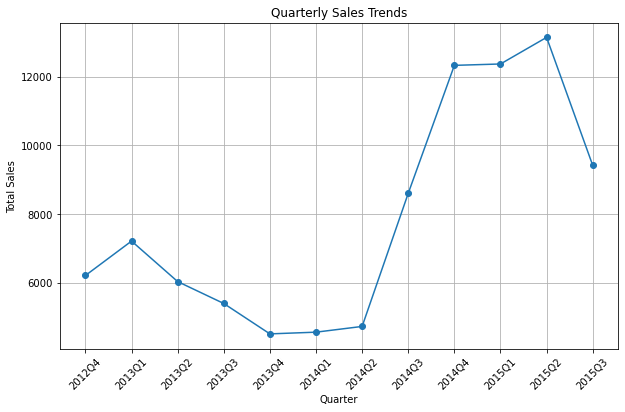

In [75]:
# Create a line chart to visualize sales trends for tea products
plt.figure(figsize=(10, 6))
plt.plot(tea_df['Quarter'], tea_df['Sales'], marker='o')
plt.title('Quarterly Sales Trends')
plt.xlabel('Quarter')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.show()

In [76]:
coffee = ['Coffee', 'Espresso']
coffee_df = sales_df[sales_df["Product_type"].isin(coffee)]
coffee_df = coffee_df.groupby('Quarter')['Sales'].sum().reset_index()
coffee_df.head()

,Quarter,Sales
0,2012Q4,4651
1,2013Q1,3500
2,2013Q2,2985
3,2013Q3,3788
4,2013Q4,5478


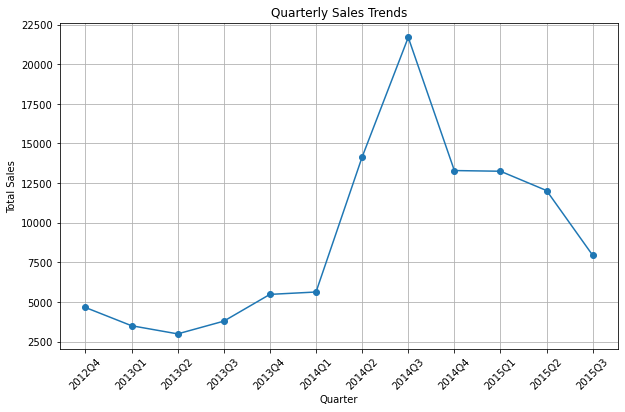

In [77]:
# Create a line chart to visualize sales trends for Coffee products
plt.figure(figsize=(10, 6))
plt.plot(coffee_df['Quarter'], coffee_df['Sales'], marker='o')
plt.title('Quarterly Sales Trends')
plt.xlabel('Quarter')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.show()

In [30]:
#specific product sales
product_sales = sales_df.groupby('Product')['Sales'].sum()
product_sales.head()

Product
Amaretto           743
Caffe Mocha       2658
Colombian         9671
Darjeeling        2882
Decaf Espresso     720
Name: Sales, dtype: int64

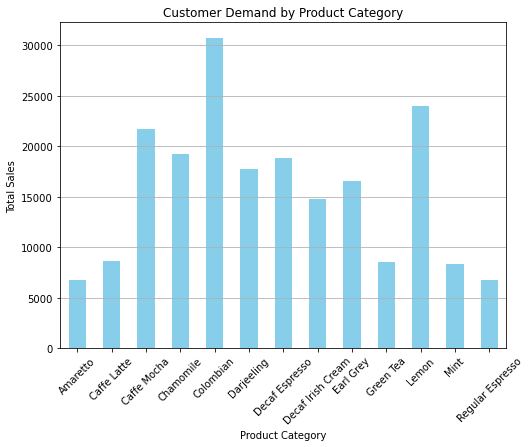

In [79]:
plt.figure(figsize=(8, 6))
product_sales.plot(kind='bar', color='skyblue')
plt.title('Customer Demand by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y')
plt.show()

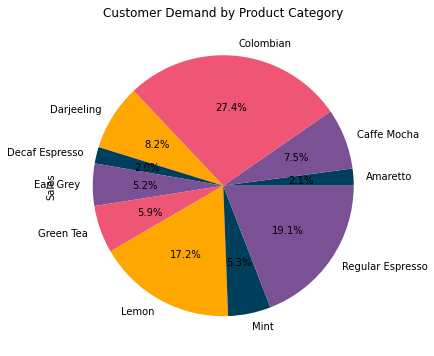

In [31]:
plt.figure(figsize=(8, 6))
product_sales.plot(kind='pie', autopct='%1.1f%%', colors=mellow_palette)
plt.title('Customer Demand by Product Category')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.gca().set_facecolor('#F5F5F5')
plt.show()

#edit colors here and its usable

In [93]:
coffee_df.dtypes

Quarter    object
Sales       int64
dtype: object

0       False
1       False
2       False
3       False
4       False
        ...  
1057    False
1058    False
1059    False
1060    False
1061    False
Name: Product_type, Length: 1062, dtype: bool


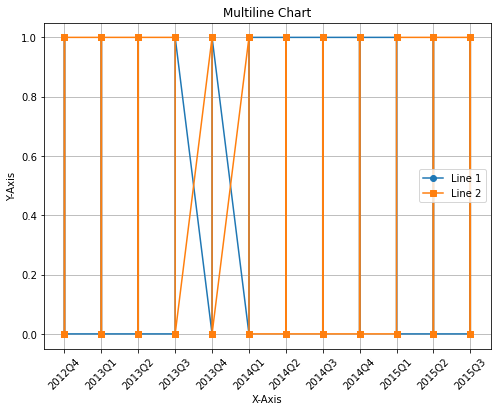

In [100]:
# Create a bar chart for performance by state broken down into tea or coffee

import numpy as np

x = sales_df['Quarter']
y1 = sales_df["Product_type"].isin(coffee)  # Data for the first line
y2 = sales_df["Product_type"].isin(tea)    # Data for the second line

plt.figure(figsize=(8, 6))
plt.plot(x, y1, marker='o', label='Line 1')  # Plot the first line
plt.plot(x, y2, marker='s', label='Line 2')  # Plot the second line

# Customize the chart
plt.xlabel('X-Axis')
plt.ylabel('Y-Axis')
plt.xticks(rotation=45)
plt.title('Multiline Chart')
plt.legend()

# Show the chart
plt.grid(True)
plt.show()



#plt.bar(sales_df['State_abbr'], sales_df['Sales'], color=mellow_palette, label='Sales')
#plt.xlabel('State')
#plt.gca().set_facecolor('#F5F5F5')
#plt.xticks(rotation=45)
#plt.ylabel('Sales in Hundred Thousands')
#plt.title('Sales Performance by State')
#plt.legend()
#plt.show()